# Bayesian ML

**Created**: 03/13/2022  
**Author**: Gareth Harman  
**Entity**: ReproNim 

### Module Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Problem 1: Estimating the Uniform Distribution

Lets create a random uniform distribution with bounds,

$$a = 40$$
$$b = 100$$

What is the mean and variance of this distribution?




In [2]:
'''###############################################
Solution
###############################################'''
   
a, b = 40, 100

mu = (a + b)/2
std = np.sqrt((b-a)**2/12)

print(f'Mean: {mu:.4f} Std: {std:.4f}')

Mean: 70.0000 Std: 17.3205


- Draw 1000 samples from this distribution (without using numpy.random.uniform, but can use random.random to generate float between 0-1)
- Plot this distribution and find the mean, std of this sampling 

**Your sampled mean/std should roughly match the theoretical mean/std**

Play around with the number of samples we draw, what do you notice?
    - This is a very important concept referred to as the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

Mean: 70.2658 Std: 17.3942


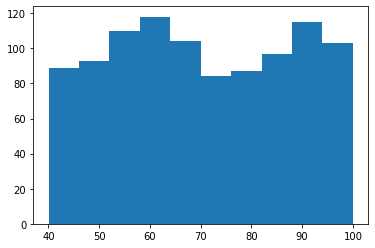

In [3]:
'''###############################################
Solution
###############################################'''
   
x = []
for ii in range(1000):
    x.append(a + (b -a) * random.random())
    
mu = sum(x)/len(x)

std = np.sqrt(np.sum(np.subtract(x, mu)**2)/len(x))

print(f'Mean: {mu:.4f} Std: {std:.4f}')
plt.hist(x)
plt.show()


# Problem 2: The PDF and CDF

## The Probability Density Function

**The PDF is a function that describes the probability that a random variable is equal to $X$**

- $\int{PDF} = 1$

## The Cumulative Distribution Function

**The CDF is the probability that random variable values less than or equal to $X$**

- This function is monotonic increasing function that arrives at 1

**Let's visualize these and discuss their properties using** `scipy.stats.norm()`

- This creates an instance of a distribution given some value for $\mu$ and $\sigma$
- This class has function attributes that allow us to access the `.cdf()` and `.pdf()`

So what questions could we ask here?

Given, $\mathcal{N}\left(\mu = 0, \sigma^{2} = 1\right)$

__Problems__
1. What if I wanted to know the probability that a random variable $X = .003$?
2. What if I wanted to know the probability that a random variable $X \le -2$?
3. What if I wanted to know the probability that a random variable $X \ge 1.25$?

Prob 1: 0.399 Prob 2: 0.023 Prob 3: 0.106


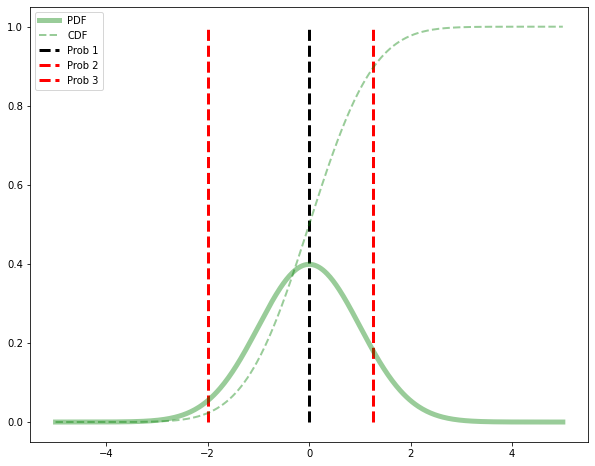

In [4]:
'''###############################################
Solution
###############################################'''

from scipy.stats import norm

mu = 0
std = 1

# Create the distribution
dist = norm(mu, std)

# Range over which we access the pdf/cdf
x = np.linspace(-5, 5, 500)

# Obtain the pdf over this range of x
pdf = dist.pdf(x)

# Obtain the cdf over this range of x
cdf = dist.cdf(x)

# Answers to the problems
prob1 = dist.pdf(.003)
prob2 = dist.cdf(-2)
prob3 = 1 - dist.cdf(1.25)

print(f'Prob 1: {prob1:.3f} Prob 2: {prob2:.3f} Prob 3: {prob3:.3f}')

# Plot this
fig = plt.figure(figsize = (10, 8))
plt.plot(x, pdf, color = 'green', alpha = .4, linewidth = 5, label = 'PDF')
plt.plot(x, cdf, color = 'green', alpha = .4, linewidth = 2, linestyle = '--', label = 'CDF')
plt.vlines(x = .003, ymin = 0, ymax = 1, linewidth = 3, linestyle = '--', color = 'k', label = 'Prob 1')
plt.vlines(x = -2, ymin = 0, ymax = 1, linewidth = 3, linestyle = '--', color = 'r', label = 'Prob 2')
plt.vlines(x = 1.25, ymin = 0, ymax = 1, linewidth = 3, linestyle = '--', color = 'r', label = 'Prob 3')
plt.legend()
plt.show()

# Problem 3: The Joint Distribution

Here we are going to visualize the differences between,

1. Two **independent** Gaussian RVs 
2. Two **correlated** Gaussian RVs

### Normal Probability Density Function

Remember the pdf of the normal distribution is given by equation 1 below

**Equation 1:** Univariate Gaussian$$PDF=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$$

**Equation 2:** Multivariate Gaussian$$
PDF=\operatorname{det}(2 \pi \mathbf{\Sigma})^{-\frac{1}{2}} e^{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})}
$$

**Note:** This only exists when our covariance matrix **($\Sigma$)** is [positive definite](https://en.wikipedia.org/wiki/Definite_matrix)

However, for time, we are not going to write this function ourselves we can use,

- `scipy.stats.multivariate_normal()`
- numpy also has `numpy.random.multivariate_normal()`

First, we set up some functions to generate a mesh grid (2D) over which to generate our PDF and plot our outcome

In [5]:

def genMesh(lb, ub, n):

    # Two linspace vectors
    x = np.linspace(lb, ub, n)
    y = np.linspace(lb, ub, n)
    
    # These will be our X and Y coordinates for plotting
    X, Y = np.meshgrid(x, y)
    
    # This is the matrix over which we generate our PDF
    pos = np.zeros((n, n, 2))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    
    return X, Y, pos


def plot_multivariate_normal(X, Y, Z, lb = -5, ub = 5, cmap = 'coolwarm'):
    
    # Instantiate plot
    fig = plt.figure(figsize=(20,12))
    ax = fig.add_subplot(111, projection='3d')

    # Surface Plot
    ax.plot_surface(X, Y, Z, rstride = 8, cstride = 8, alpha = 0.25, cmap = cmap)
    
    # Contour plots for density, X and Y
    ax.contourf(X, Y, Z, zdir = 'z', offset = np.min(Z), alpha = .4, cmap = cmap)
    ax.contourf(X, Y, Z, zdir = 'x', offset = np.min(X), cmap = 'binary', levels = 1)
    ax.contourf(X, Y, Z, zdir = 'y', offset = np.max(Y), cmap = 'binary', levels = 1)
    
    # Fix labels
    ax.grid(False)
    ax.set_xlabel('Distr(X)'); ax.set_xlim(lb, ub)
    ax.set_ylabel('Distr(Y)'); ax.set_ylim(lb, ub)
    ax.set_zlim(np.min(Z), np.max(Z))
    
    #ax.set_title('Multivariate Gaussian')
    ax.view_init(25, -25)
    plt.show()
    

### Create two **independent** Gaussian RVs 

Remember that our covariance diagonal describes the std of each random variable, and the off-diagonal describes the covariance between variables

Your task is just to define the covariance matrix $\Sigma$

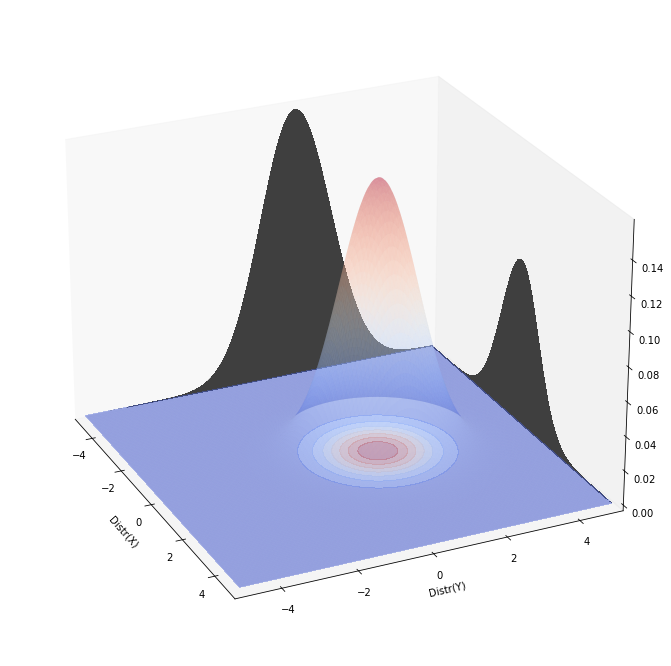

In [6]:

'''###############################################
Solution
###############################################'''

from scipy.stats import norm, multivariate_normal

# Generate our X, Y, pos
X, Y, pos = genMesh(-5, 5, 1000)

# Create our array of mu
mus = np.array([0.0, 1.0])

# Create our covariance matrix for INDEPENDENT gaussian rvs
cov = np.array([[1.0, 0],
                [0, 1.0]])

# Create our multivariate normal
rv = multivariate_normal(mus, cov)
Z = rv.pdf(pos)

# Plot this
plot_multivariate_normal(X, Y, Z)


### Create two **correlated** Gaussian RVs

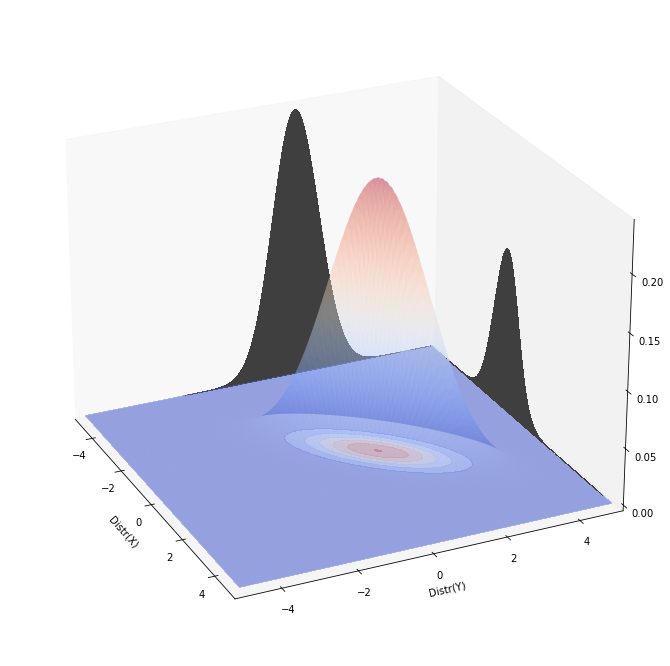

In [7]:

'''###############################################
Solution
###############################################'''

from scipy.stats import norm, multivariate_normal

# Generate our X, Y, pos
X, Y, pos = genMesh(-5, 5, 1000)

# Create our array of mu
mus = np.array([0.0, 1.0])

# Create our covariance matrix for CORRELATED gaussian rvs
cov = np.array([[1.0, .75],
                [.75, 1.0]])

# Create our multivariate normal
rv = multivariate_normal(mus, cov)
Z = rv.pdf(pos)

# Plot this
plot_multivariate_normal(X, Y, Z)


# Problem 4: Bayeisan Hypothesis Testing

**Objective**

Minimize the probabilty of error (comparing the posterior distribution of $H$)

**Given,**

Our Priors of $H_0$ and $H_1$, 

$$p_{H}\left(H_{0}\right) \triangleq P_{0}$$
$$p_{H}\left(H_{1}\right) \triangleq P_{1}$$

And our Likelihood of $H_0$ and $H_1$ given $y$, 

$$H_{0}: p_{y \mid H}\left(y \mid H_{0}\right)$$
$$H_{1}: p_{y \mid H}\left(y \mid H_{1}\right)$$

**Our decision rule,**

$$p_{H \mid Y}\left(H_{1} \mid y\right) \stackrel{\hat{H}_{1}}{\underset{\hat{H}_{0}}{\gtrless}} p_{H \mid Y}\left(H_{0} \mid y\right)$$

Which we can rewrite as the **likelihood ratio test**,

$$
\frac{p_{Y \mid H}\left(y \mid H_{1}\right)}{p_{Y \mid H}\left(y \mid H_{0}\right)} \stackrel{\hat{H}_{1}}{\underset{\hat{H}_{0}}{\gtrless}} \frac{P_{0}}{\hat{P}_{1}}
$$


### We are going to be calculating Sensitivity and Specificity

Here we can define a few things,

**True Positive**
- The probability we guessed $H_1$ given it was $H_1$
- AUC of H1 to the right of boundary

**True Negative** 
- The probability we guessed $H_0$ given it was $H_0$ 
- AUC of H0 to the left of boundary

**False Positive**
- The probability we guessed $H_0$ given it was $H_1$ 
- AUC of H0 to the right of boundary

**False Negative** 
- The probability we guessed $H_1$ given it was $H_0$ 
- AUC of H1 to the left of boundary


**Sensitivity**

$$\frac{TP}{TP + FN}$$

**Specificity**

$$\frac{TN}{TN + FP}$$

![](dist.png)


## Your task: find sensitivity and specificity under 4 conditions

1. $H_0$ and $H_1$ are equally likely and means are close (by given $\mu$'s $\sigma$s)
2. $H_0$ is more likely
3. $H_1$ is more likely
4. $H_0$ and $H_1$ are equally likely and means are more distant

#### For problems 1-3 use these parameters
- $\mu_1 = 0, \mu_2 = 2$
- $\sigma_1 = 1, \sigma_2 = 1$

#### For problem 4 use these parameters
- $\mu_1 = 0, \mu_2 = 3.5$
- $\sigma_1 = 1, \sigma_2 = 1$
    
### REMEMBER! This is important

Because $P_0 + P_1 = 1$,

- $P_{Y|H(y|H_0)}$ will integrate to $P_0$ 

**AND**

- $P_{Y|H(y|H_1)}$ will integrate to $P_1$ 

**This will affect our PDF/CDF!**

In [8]:

def plot_hypothesis(x, p0, p1, pdf_py_H0, pdf_py_H1, cdf_py_H0, cdf_py_H1, intersect_x, intersect_y):

    fig, ax = plt.subplots(figsize = (10, 8))

    # Plot PDFs of H0/H1
    ax.plot(x, pdf_py_H0, color = 'purple', alpha = .4, linewidth = 5, label = 'PDF H0')
    ax.plot(x, pdf_py_H1, color = 'green', alpha = .4, linewidth = 5, label = 'PDF H1')

    # Plot CDFs of H0/H1
    ax.plot(x, cdf_py_H0, color = 'purple', alpha = .4, linewidth = 2, linestyle = '--', label = 'CDF H0')
    ax.plot(x, cdf_py_H1, color = 'green', alpha = .4, linewidth = 2, linestyle = '--', label = 'CDF H1')

    # Plot intercept
    ax.vlines(x = intersect_x, ymin = 0, ymax = 1, linewidth = 3, linestyle = '--', color = 'k')
    ax.scatter(intersect_x, intersect_y, s = 75, color = 'blue', )
    ax.legend()
    ax.set_ylim(0, 1)

    plt.show()
    

## Here is the function you will write that will get you the answer

- Fill in the appropriate parts to correctly return sensitivity and specificity

In [9]:

'''###############################################
Solution
###############################################'''

def get_sens_spec(x, p0, p1, mu1, mu2, std1, std2, plot = True):

    # Create distributions of Y given H0/H1
    py_H0 = norm(mu1, std1)
    py_H1 = norm(mu2, std2)

    # Create the pdfs
    pdf_py_H0 = py_H0.pdf(x) * p0
    pdf_py_H1 = py_H1.pdf(x) * p1

    # Create the cdfs
    cdf_py_H0 = py_H0.cdf(x) * p0
    cdf_py_H1 = py_H1.cdf(x) * p1
    
    # This fancy number will find us the intersectin of our two PDFS
        # credit: https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
    intersect_ind = np.argwhere(np.diff(np.sign(pdf_py_H0 - pdf_py_H1))).flatten()
    
    # Get the intersections by ind 
    intersect_x = x[intersect_ind][0]
    intersect_y = py_H0.pdf(intersect_x) * p0

    if plot:
        plot_hypothesis(x, p0, p1, pdf_py_H0, pdf_py_H1, cdf_py_H0, cdf_py_H1, intersect_x, intersect_y)

    # Return sensitivity, specificity
    TP = 1 - (py_H1.cdf(intersect_x))
    TN = py_H0.cdf(intersect_x)
    FP = 1 - (py_H0.cdf(intersect_x))
    FN = py_H1.cdf(intersect_x)    
    sens = TP/(TP + FN)
    spec = TN/(TN + FP)
    
    print(f'Sens: {sens:.3f} Spec: {spec:.3f}\n')
    
    return sens, spec


## 1. $H_0$ and $H_1$ are equally likely

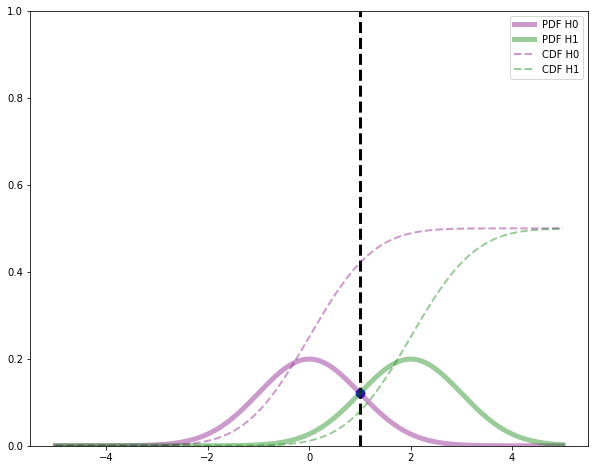

Sens: 0.843 Spec: 0.839



In [10]:

'''###############################################
Solution
###############################################'''

# Range of x
x = np.linspace(-5, 5, 500)

# The priors of H0/H1
p0, p1 = .5, .5

# Mean, std for H0/H1
mu1, mu2 = 0, 2
std1, std2 = 1, 1

sens1, spec1 = get_sens_spec(x, p0, p1, mu1, mu2, std1, std2)


## 2. $H_0$ is more likely

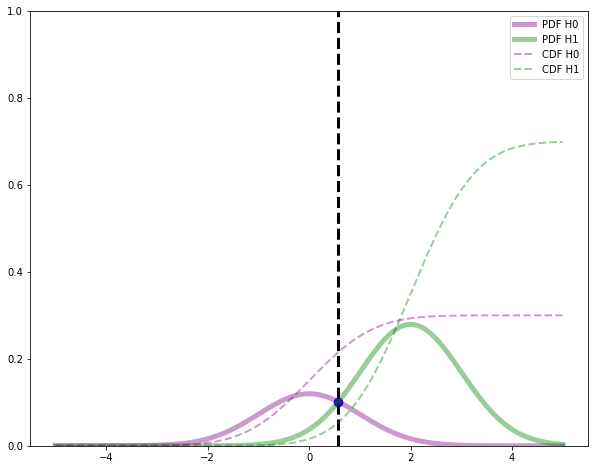

Sens: 0.923 Spec: 0.716



In [11]:

'''###############################################
Solution
###############################################'''

# Range of x
x = np.linspace(-5, 5, 500)

# The priors of H0/H1
p0, p1 = .3, .7

# Mean, std for H0/H1
mu1, mu2 = 0, 2
std1, std2 = 1, 1

sens2, spec2 = get_sens_spec(x, p0, p1, mu1, mu2, std1, std2)


## 3. $H_1$ is more likely

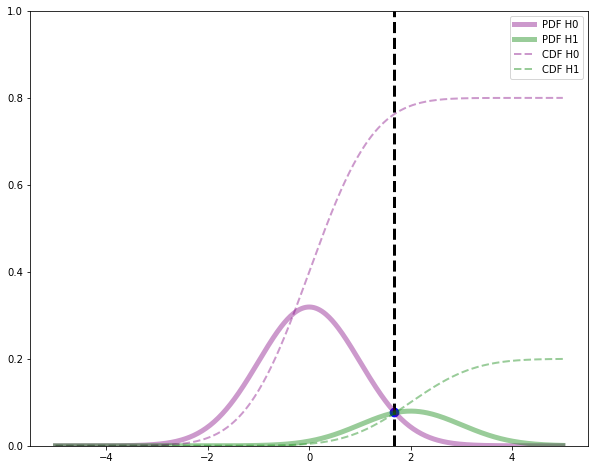

Sens: 0.628 Spec: 0.953



In [12]:

'''###############################################
Solution
###############################################'''

# Range of x
x = np.linspace(-5, 5, 500)

# The priors of H0/H1
p0, p1 = .8, .2

# Mean, std for H0/H1
mu1, mu2 = 0, 2
std1, std2 = 1, 1

sens3, spec3 = get_sens_spec(x, p0, p1, mu1, mu2, std1, std2)


## 4. $H_0$ and $H_1$ are equally likely and means are more distant

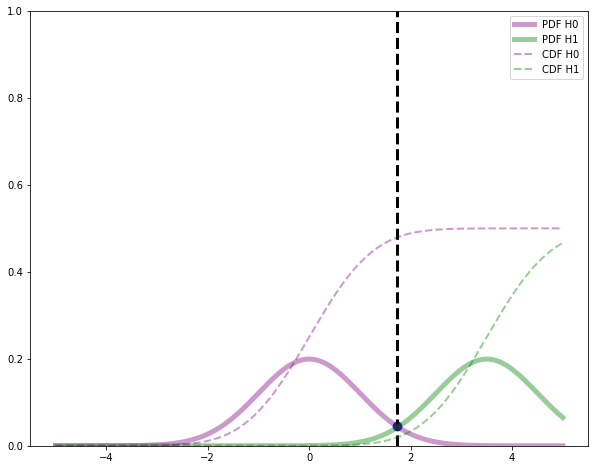

Sens: 0.961 Spec: 0.958



In [13]:

'''###############################################
Solution
###############################################'''

# Range of x
x = np.linspace(-5, 5, 500)

# The priors of H0/H1
p0, p1 = .5, .5

# Mean, std for H0/H1
mu1, mu2 = 0, 3.5
std1, std2 = 1, 1

sens4, spec4 = get_sens_spec(x, p0, p1, mu1, mu2, std1, std2)


## Plot our ROC curve

1. What do you notice about it?
2. Why are problems 4 and 1 different? They both have equal priors


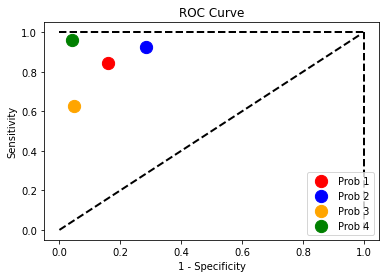

In [14]:

'''###############################################
Solution
###############################################'''

fig, ax = plt.subplots(figsize = (6, 4))

# Setup lines
ax.plot(np.arange(0, 1, .01), np.arange(0, 1, .01), linewidth = 2, linestyle = '--', color = 'k')
ax.vlines(x = 1, ymin = 0, ymax = 1, linewidth = 2, linestyle = '--', color = 'k')
ax.hlines(y = 1, xmin = 0, xmax = 1, linewidth = 2, linestyle = '--', color = 'k')

# Plot
ax.scatter(1 - spec1, sens1, s = 150, color = 'red', label = 'Prob 1')
ax.scatter(1 - spec2, sens2, s = 150, color = 'blue', label = 'Prob 2')
ax.scatter(1 - spec3, sens3, s = 150, color = 'orange', label = 'Prob 3')
ax.scatter(1 - spec4, sens4, s = 150, color = 'green', label = 'Prob 4')

# Chhanges
ax.set_title('ROC Curve')
ax.set_xlabel('1 - Specificity')
ax.set_ylabel('Sensitivity')
ax.legend(loc = 'lower right')
plt.show()


# Extra Content: LMMSE estimator 

Here we are constructing the LMMSE estimator for jointly Gaussian random variables, assuming an increasing number of samples


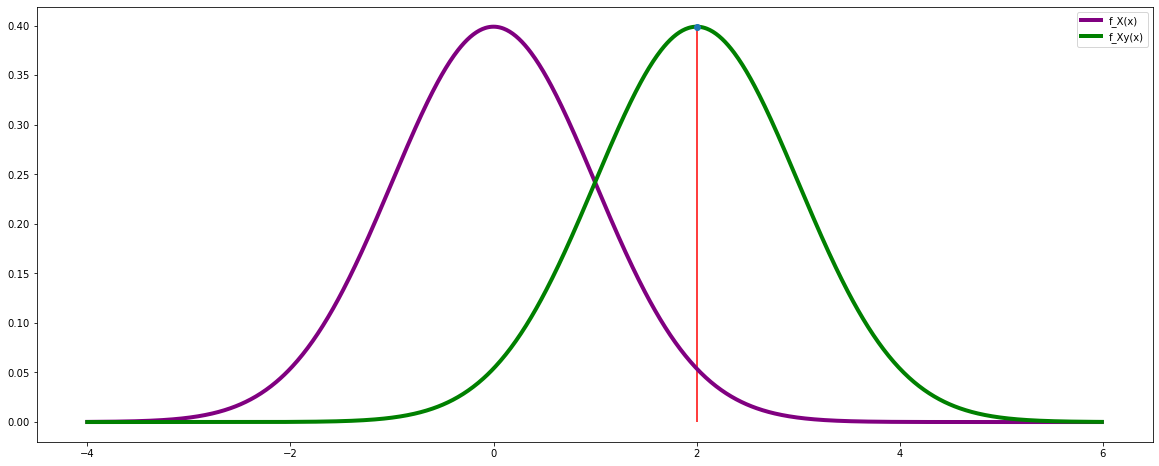

In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Our range of x
n = np.arange(-4, 6, .01)

# First distribution (prior) and pdf
normal1 = norm(0, 1)
f_y = normal1.pdf(n)

# Second distribution and pdf
Y = 2
normal2 = norm(Y, 1)
f_xy = normal2.pdf(n)

# Plot these 
fig = plt.figure(figsize = (20, 8))

plt.plot(n, f_y, label = 'f_X(x)', linewidth = 4, color = 'purple')
plt.plot(n, f_xy, label = 'f_Xy(x)', linewidth = 4, color = 'green')
plt.stem([Y], [normal2.pdf(Y)], linefmt = 'red')
plt.legend()


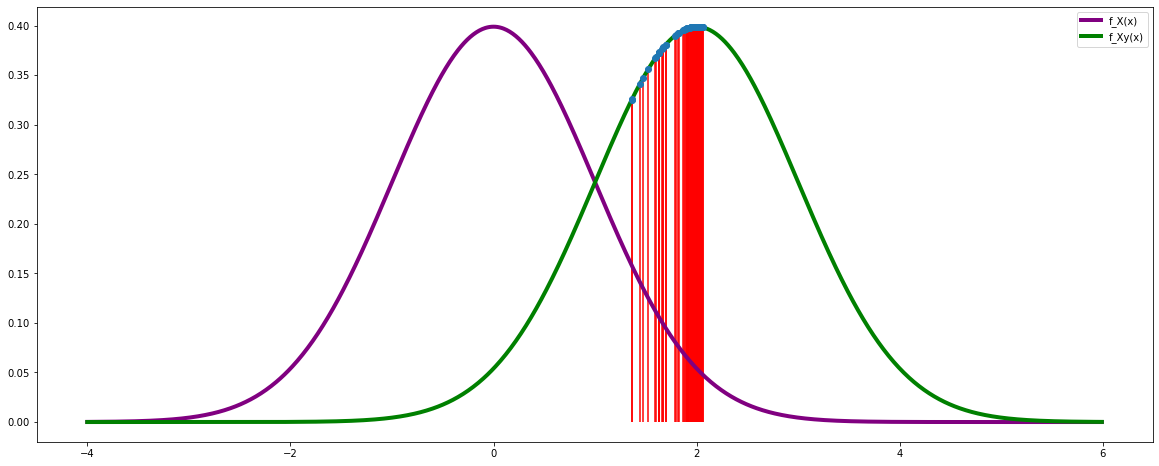

In [16]:

# Reinstantiate plot
fig = plt.figure(figsize = (20, 8))

plt.plot(n, f_y, label = 'f_X(x)', linewidth = 4, color = 'purple')
plt.plot(n, f_xy, label = 'f_Xy(x)', linewidth = 4, color = 'green')
plt.stem([Y], [normal2.pdf(Y)])
plt.legend()

# Number of samples we will add
N = 100
X = Y + np.random.normal(size = N)
X[0] = np.exp(1)

# Our estimator
Yest = np.zeros(X.shape)

# Loop through our number of samples
for i in range(N):
        
    C_XY = 1 + np.eye(i+1)
    C_xy = np.ones((i+1, 1))
    a = np.linalg.inv(C_XY) @ C_xy
    
    z = a.T @ X[:i+1]
    Yest[i] = z[0]
    
    plt.stem([Yest[i]], [normal2.pdf(Yest[i])], linefmt = 'red')

plt.show()
    